In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
plt.style.use('seaborn')
df = pd.read_csv('kc_house_data.csv')

In [3]:
display(df.head())
display(df.tail())
display(df.sample(30))
display(df.info())
display(np.round(df.describe()))
df.shape

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4014,622059031,6/4/2014,759600.0,4,1.00,1540,115434,1.5,0.0,0.0,...,7,1540,0.0,1923,0.0,98031,47.4163,-122.220,2027,23522
1507,8562890560,6/26/2014,399000.0,4,3.00,3060,5000,2.0,0.0,0.0,...,8,3060,0.0,2001,0.0,98042,47.3786,-122.126,3060,5668
7265,925059193,7/9/2014,1070000.0,4,3.75,4260,9800,2.0,NaN,0.0,...,10,4260,0.0,2008,0.0,98033,47.6739,-122.172,1950,8970
2705,4027701294,1/29/2015,485000.0,3,2.75,2650,12350,1.0,0.0,0.0,...,7,1470,1180.0,1975,0.0,98028,47.7669,-122.268,1950,14075
6491,4137000250,3/18/2015,355000.0,4,2.50,2130,9268,2.0,0.0,0.0,...,8,2130,0.0,1985,NaN,98092,47.2620,-122.220,2100,8400
762,826079094,3/24/2015,330000.0,3,2.00,1400,218252,1.0,0.0,0.0,...,7,1400,0.0,1997,0.0,98019,47.7576,-121.934,2230,218222
17012,9292000380,8/18/2014,425000.0,3,2.25,1740,9682,1.0,NaN,0.0,...,8,1740,0.0,1969,0.0,98056,47.5138,-122.173,2100,9536
2338,5556800260,3/5/2015,230000.0,4,2.00,1440,10800,1.0,0.0,0.0,...,7,1440,0.0,1967,NaN,98001,47.3417,-122.283,1190,7380
18860,4389201241,12/30/2014,1950000.0,4,4.00,4690,6900,2.0,0.0,0.0,...,11,3480,1210.0,2001,0.0,98004,47.6165,-122.216,2800,11240
4770,2621400080,1/28/2015,275000.0,4,2.50,2120,6754,2.0,0.0,0.0,...,7,2120,0.0,1998,0.0,98030,47.3629,-122.184,2120,6937


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


None

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,19221.0,21534.0,21597.0,21597.0,21597.0,21597.0,17755.0,21597.0,21597.0,21597.0,21597.0,21597.0
mean,4.580474e+09,540297.0,3.0,2.0,2080.0,15099.0,1.0,0.0,0.0,3.0,8.0,1789.0,1971.0,84.0,98078.0,48.0,-122.0,1987.0,12758.0
std,2.876736e+09,367368.0,1.0,1.0,918.0,41413.0,1.0,0.0,1.0,1.0,1.0,828.0,29.0,400.0,54.0,0.0,0.0,685.0,27274.0
min,1.000102e+06,78000.0,1.0,0.0,370.0,520.0,1.0,0.0,0.0,1.0,3.0,370.0,1900.0,0.0,98001.0,47.0,-123.0,399.0,651.0
25%,2.123049e+09,322000.0,3.0,2.0,1430.0,5040.0,1.0,0.0,0.0,3.0,7.0,1190.0,1951.0,0.0,98033.0,47.0,-122.0,1490.0,5100.0
50%,3.904930e+09,450000.0,3.0,2.0,1910.0,7618.0,2.0,0.0,0.0,3.0,7.0,1560.0,1975.0,0.0,98065.0,48.0,-122.0,1840.0,7620.0
75%,7.308900e+09,645000.0,4.0,2.0,2550.0,10685.0,2.0,0.0,0.0,4.0,8.0,2210.0,1997.0,0.0,98118.0,48.0,-122.0,2360.0,10083.0
max,9.900000e+09,7700000.0,33.0,8.0,13540.0,1651359.0,4.0,1.0,4.0,5.0,13.0,9410.0,2015.0,2015.0,98199.0,48.0,-121.0,6210.0,871200.0


(21597, 21)

In [4]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [5]:
display(df.id.duplicated().any())
df.id.duplicated().sum()

True

177

In [6]:
df.id.drop_duplicates(keep='last', inplace = True)
display(df.id.duplicated().any())
df.id.duplicated().sum()

False

0

In [7]:
data = df.drop(['id'], axis = 1)
data.date = pd.to_datetime(data.date)

In [8]:
day = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
       4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
season_names = {1: 'Winter', 2 : 'Spring', 3: 'Summer', 4: 'Fall'}
data['day'] = data.date.dt.dayofweek.map(day)
season = data.date.apply(lambda dt: (dt.month%12 + 3)//3)
data['season'] = season.map(season_names)

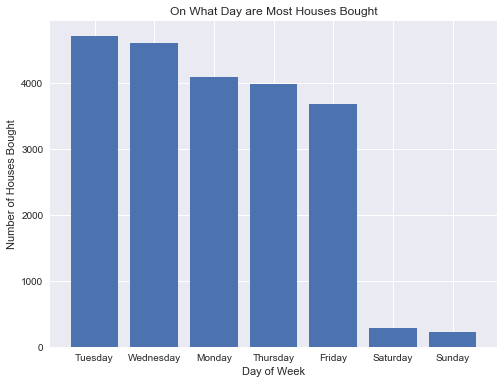

In [9]:
plt.figure(figsize = (8,6))
plt.bar(data.day.value_counts().index, data.day.value_counts().values)
plt.title('On What Day are Most Houses Bought')
plt.xlabel('Day of Week')
plt.ylabel('Number of Houses Bought')
plt.show()

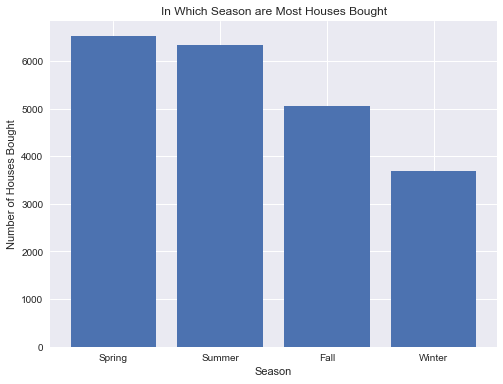

In [10]:
plt.figure(figsize = (8,6))
plt.bar(data.season.value_counts().index, data.season.value_counts().values)
plt.title('In Which Season are Most Houses Bought')
plt.xlabel('Season')
plt.ylabel('Number of Houses Bought')
plt.show()

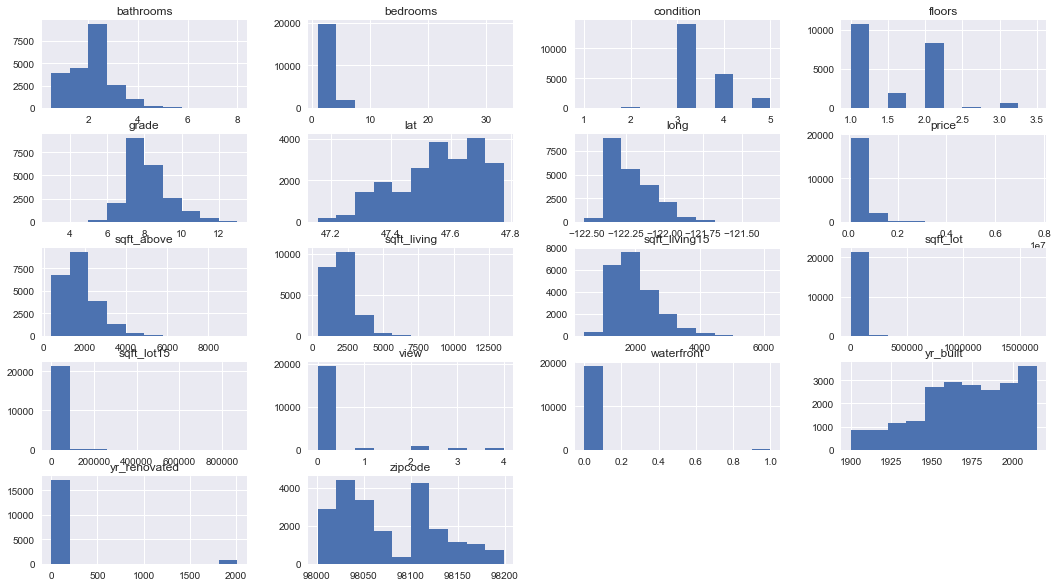

In [11]:
data.hist(figsize=(18,10));

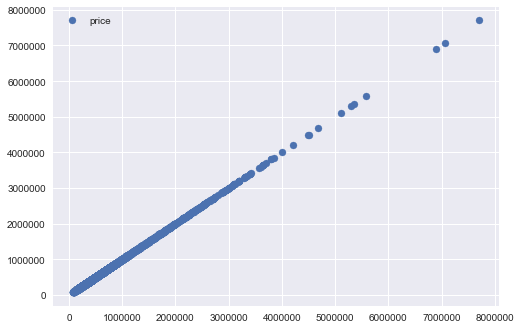

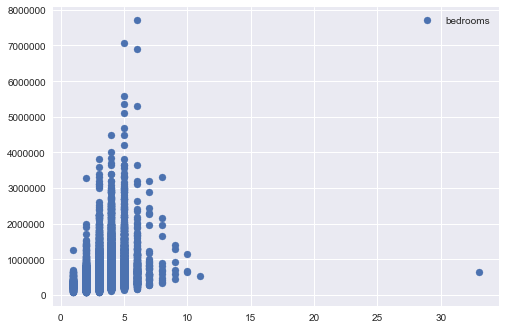

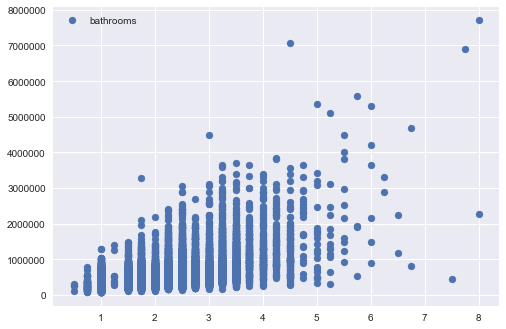

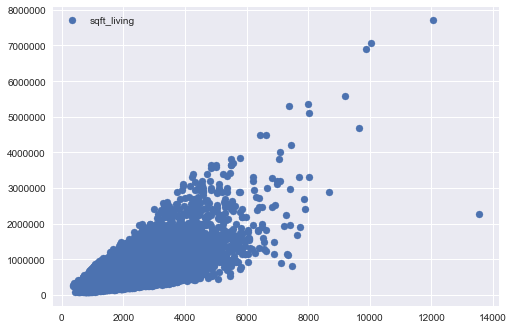

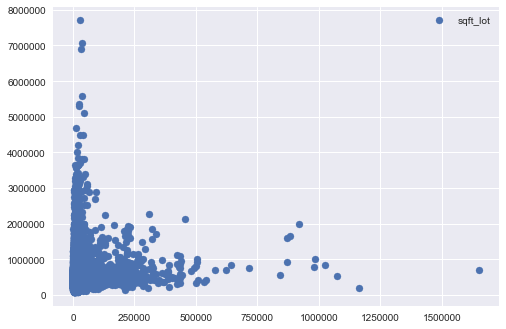

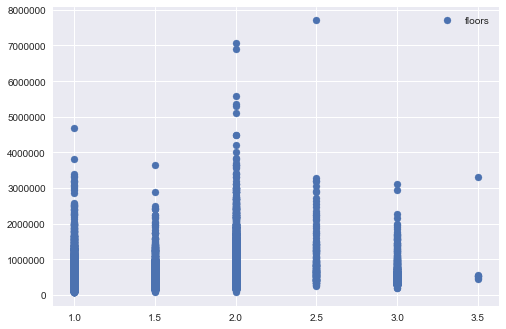

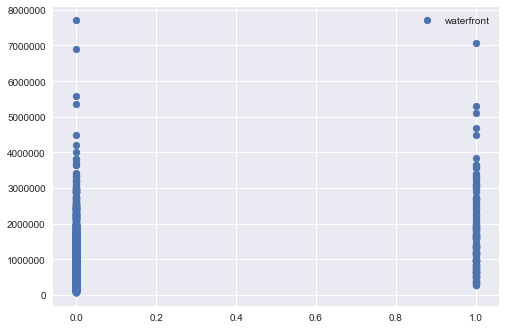

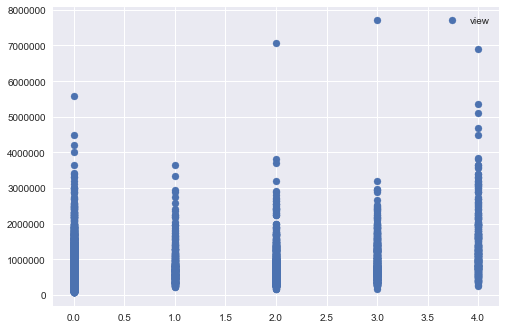

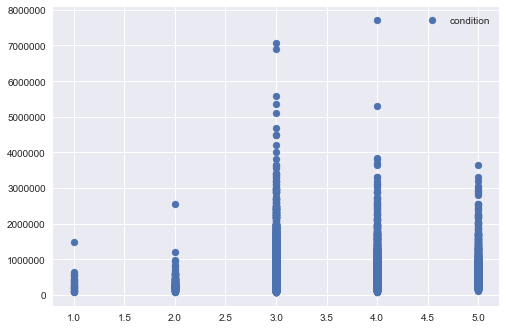

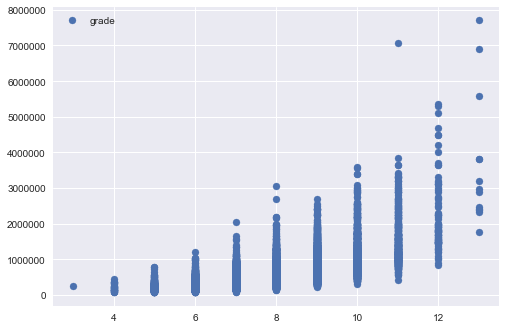

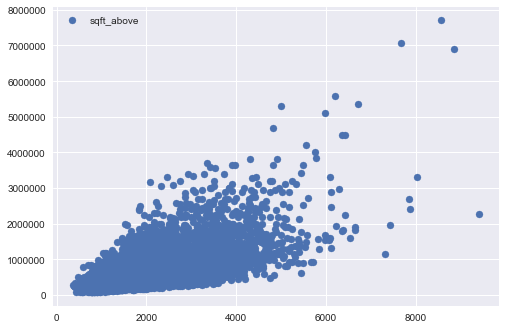

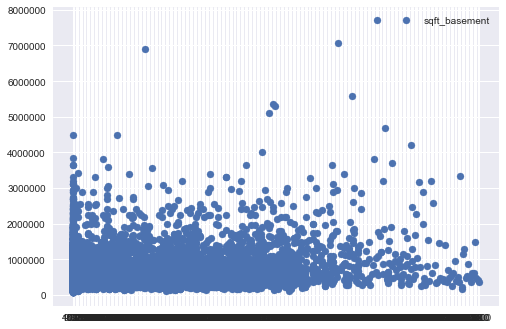

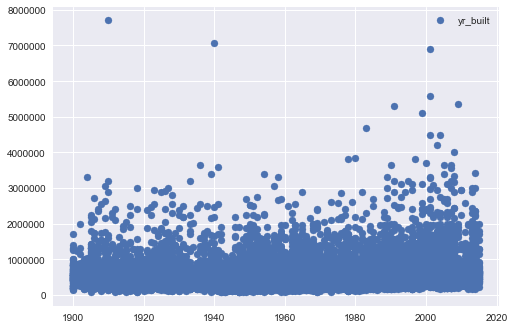

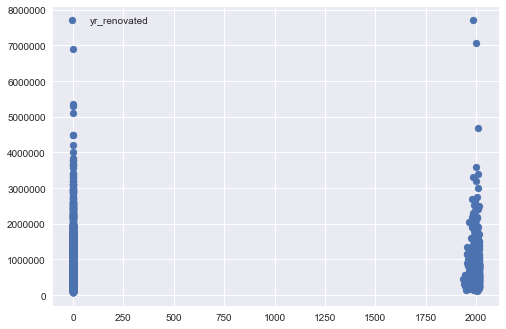

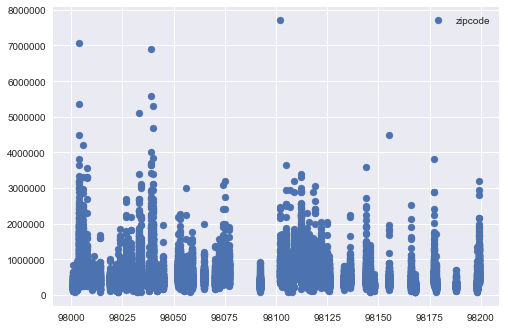

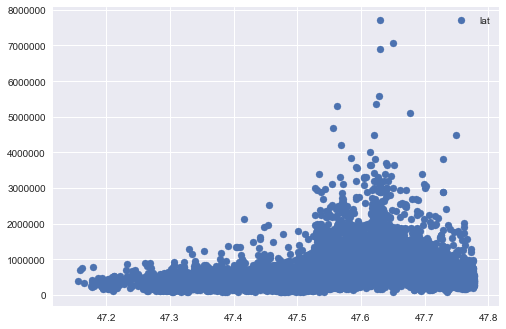

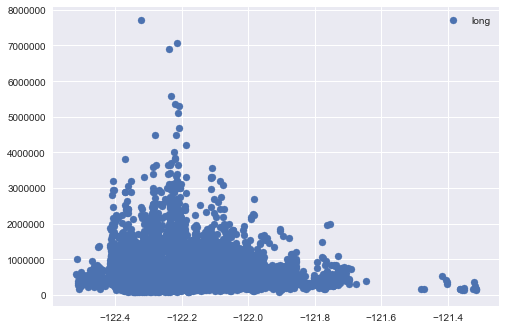

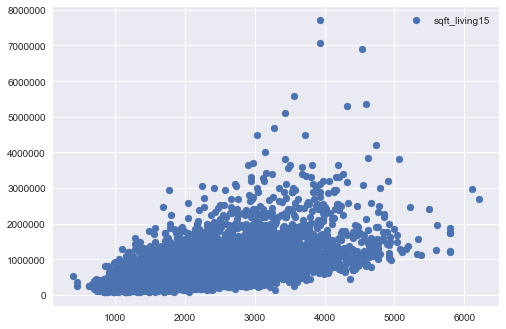

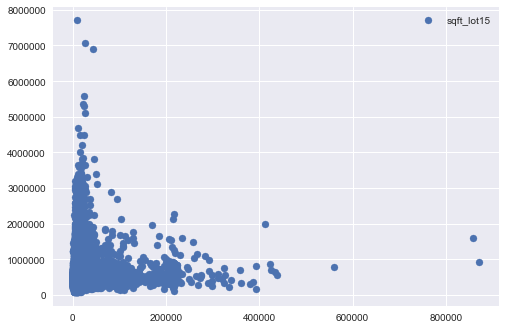

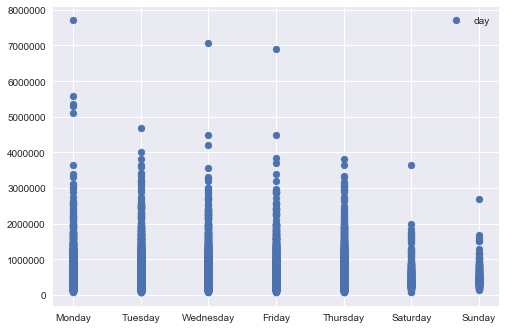

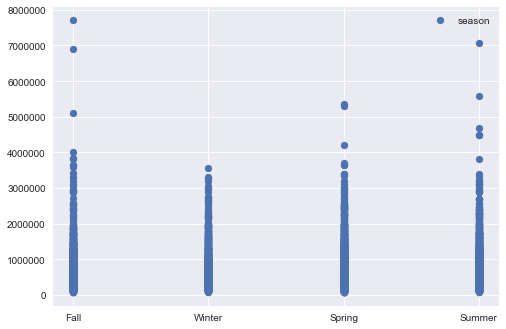

In [12]:
l_of_col = []
for column in data.columns[1:]:
    l_of_col.append(column)
for column in l_of_col:
    plt.scatter(data[column], data.price, label=column)
    plt.legend()
    plt.show()

In [13]:
display(data.sqft_basement.value_counts().head())
data.loc[data.sqft_basement == '?', ['sqft_living', 'sqft_above']]

0.0      12826
?          454
600.0      217
500.0      209
700.0      208
Name: sqft_basement, dtype: int64

,sqft_living,sqft_above
6,1715,1715
18,1200,1200
42,3595,3595
79,3450,3450
112,1540,1160
115,4380,2780
217,2250,2250
309,3320,2220
384,4800,3480
508,1540,820


In [14]:
data.sqft_basement.replace('?', value = abs(data.sqft_living - data.sqft_above), inplace = True)
data.sqft_basement = data.sqft_basement.astype('float64')
data.sqft_basement.value_counts().head()

0.0      13110
600.0      221
700.0      218
500.0      214
800.0      206
Name: sqft_basement, dtype: int64

In [15]:
print('view null values')
display(data.view.isnull().sum())
print('view value counts')
display(data.view.value_counts())
print('yr_renovated null values')
display(data.yr_renovated.isnull().sum())
print('yr_renovated value counts')
display(data.yr_renovated.value_counts())
print('waterfront null values')
display(data.waterfront.isnull().sum())
print('waterfront value counts')
display(data.waterfront.value_counts())

view null values


63

view value counts


0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

yr_renovated null values


3842

yr_renovated value counts


0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0        1
1976.0        1
1948.0        1
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Leng

waterfront null values


2376

waterfront value counts


0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [16]:
data.view.fillna(0, inplace=True)
data.yr_renovated.fillna(0, inplace=True)
data.waterfront.fillna(0, inplace=True)

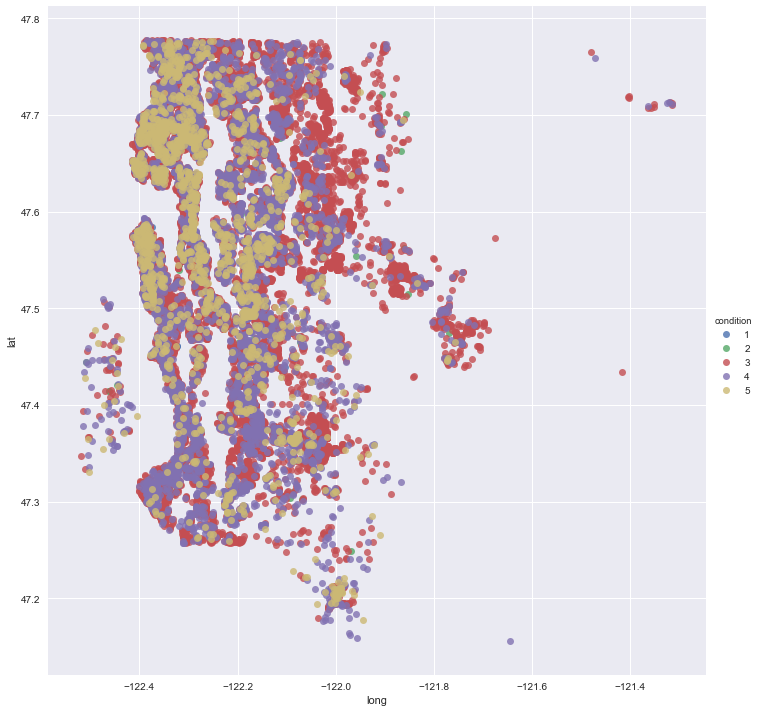

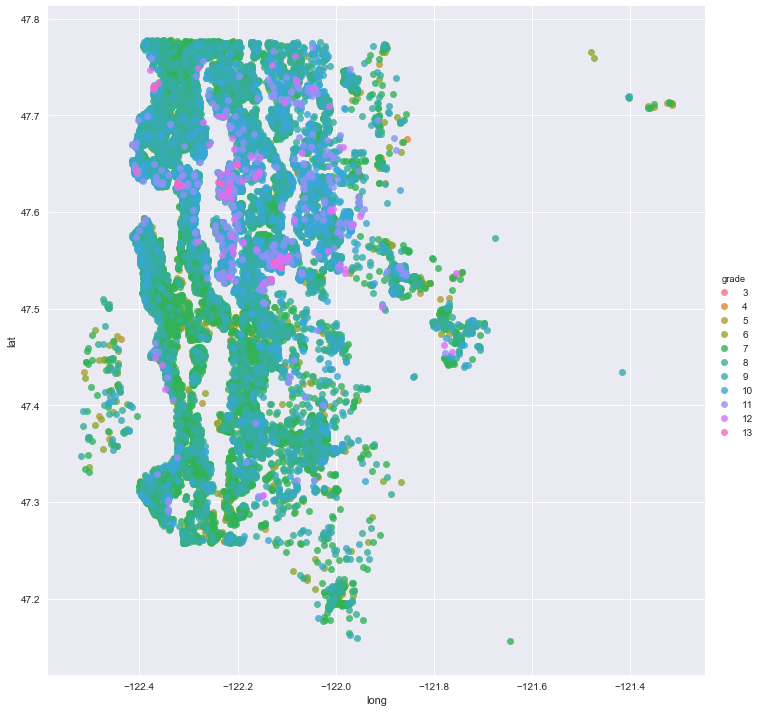

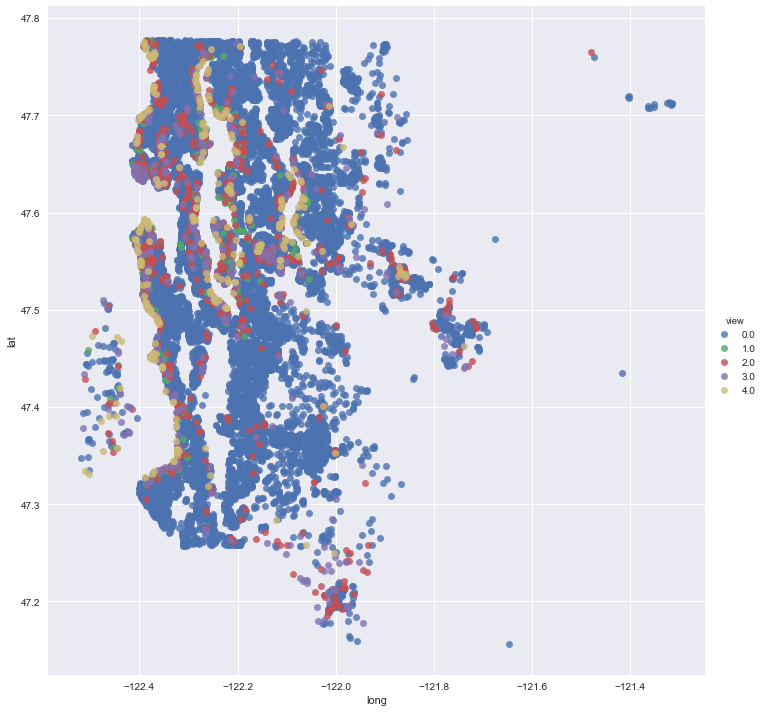

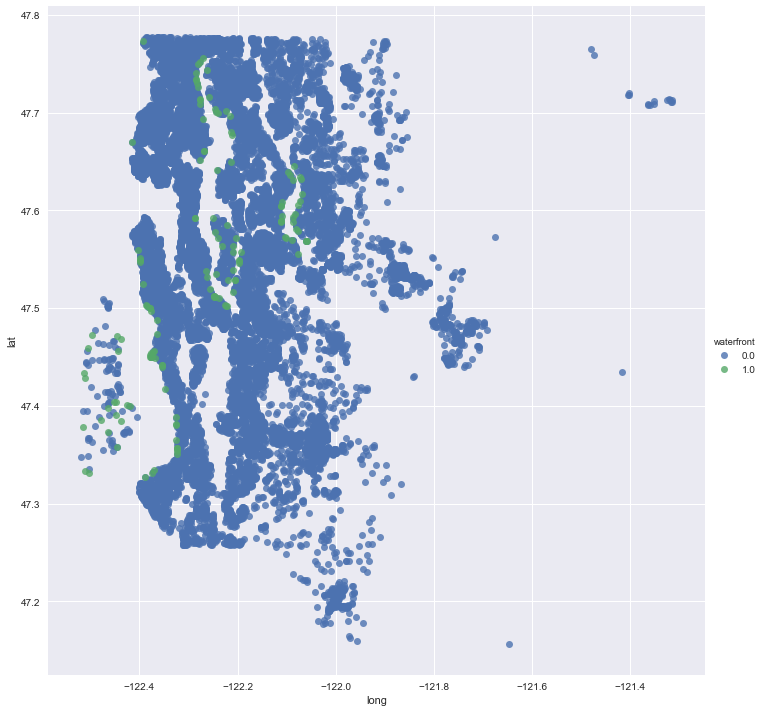

In [17]:
import seaborn as sns
from seaborn import lmplot

feature = ['condition', 'grade', 'view', 'waterfront']

for x in feature:
    lmplot(data=data, x="long", y="lat", fit_reg=False, hue=x, height=10)
    plt.show()

In [18]:
data.yr_renovated = data.yr_renovated.astype(bool)
data.rename(columns={'yr_renovated':'renovated'}, inplace=True)
data.waterfront = data.waterfront.astype(bool)
data.sqft_basement = data.sqft_basement.astype(bool)
data.rename(columns={'sqft_basement':'basement'}, inplace=True)
data.drop('view', axis = 1, inplace = True)

In [19]:
data.dtypes

date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                 bool
condition                 int64
grade                     int64
sqft_above                int64
basement                   bool
yr_built                  int64
renovated                  bool
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
day                      object
season                   object
dtype: object

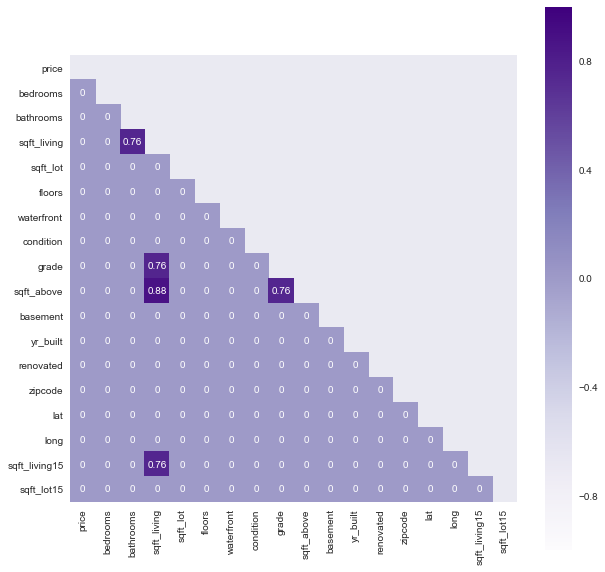

In [20]:
import seaborn as sns
plt.figure(figsize=(10, 10))
data_corr = data.corr()
data_corr[np.abs(data_corr)<.75] = 0
mask = np.zeros_like(data_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data_corr, mask=mask, center=0, annot=True, cmap="Purples", square = True, vmin=-1)

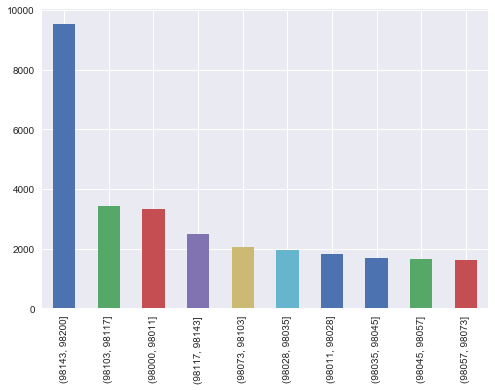

In [21]:
# first, create bins for based on the values observed. 5 values will result in 4 bins
bins = [1800, 1940, 1982, 1990, 2000, 2010, 2020]
# use pd.cut to create variable to store bins
bins_year = pd.cut(data['yr_built'], bins)
# using pd.cut returns unordered categories. Transform this to ordered categories.
bins_year = bins_year.cat.as_unordered()
bins_year.head()
# inspect the result
display(bins_year.value_counts().plot(kind='bar'))
# replace the existing "yr_built" column
data["yr_built"]=bins_year


zipbins = [98000, 98011, 98028, 98035, 98045, 98057 ,98073, 98103, 98117, 98143, 98200]
# use pd.cut
bins_zip = pd.cut(data['zipcode'], zipbins)
bins_zip = bins_zip.cat.as_unordered()
bins_zip.value_counts().plot(kind='bar')
# replace the existing "zipcode" column
data["zipcode"]=bins_zip


#change the datatype of categorical features
data["yr_built"] = data["yr_built"].cat.codes
data["zipcode"] = data["zipcode"].cat.codes
#create dummy columns to store cat.codes
zipcode_dummy = pd.get_dummies(bins_zip, prefix="ZIP")
year_dummy = pd.get_dummies(bins_year, prefix="YR")
#drop now obsolete columns
data = data.drop(["yr_built","zipcode"], axis=1)
data = pd.concat([data, zipcode_dummy, year_dummy], axis=1)

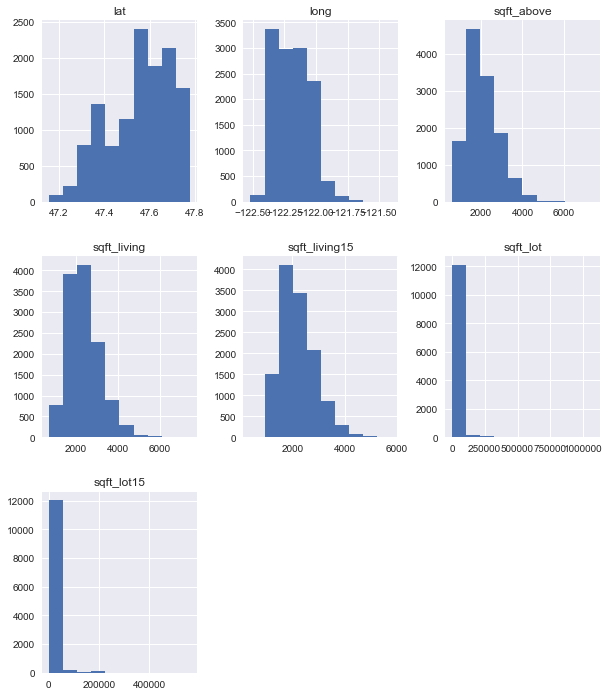

In [22]:
data= data[(data['bedrooms'] <= 5) & (data['bedrooms'] >=2)]
data= data[(data['bathrooms'] <= 3.5) & (data['bathrooms'] >=2)]

feat_cat = pd.concat([data.bedrooms, data.bathrooms, data.floors, data.condition, data.grade], axis=1)
feat_cont = pd.concat([data.sqft_above, data.sqft_living, data.sqft_living15,
                       data.sqft_lot, data.sqft_lot15, data.long, data.lat], axis=1)
feat_cont.hist(figsize=(10,12));

In [23]:
bed = pd.get_dummies(feat_cat.bedrooms, prefix='bedrooms', drop_first=True)
bath = pd.get_dummies(feat_cat.bathrooms, prefix='bathrooms', drop_first=True)
fl = pd.get_dummies(feat_cat.floors, prefix='floors', drop_first=True)
cond = pd.get_dummies(feat_cat.condition, prefix='condition', drop_first=True)
grade = pd.get_dummies(feat_cat.grade, prefix='grade', drop_first=True)

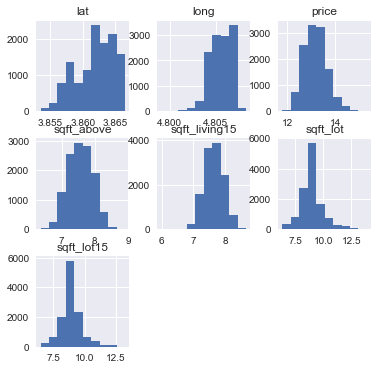

In [24]:
# Create a pandas Dataframe to store normalized values
data_log = pd.DataFrame([])
#log transform each of the values.  
data_log["sqft_lot"] = np.log(data["sqft_lot"])
data_log["sqft_above"] = np.log(data["sqft_above"])
data_log["sqft_living15"] = np.log(data["sqft_living15"])
data_log["sqft_lot15"] = np.log(data["sqft_lot15"])
data_log["lat"] = np.log(data["lat"])
data_log['price'] = np.log(data["price"])
# log transform the absolute value since longitudes are negative 
data_log["long"] = np.log(abs(data["long"]))
#graph the results to verify normalization
data_log.hist(figsize  = [6, 6]);
#store newly normalized values into variables for easier access
logabove = data_log["sqft_above"]
loglot = data_log["sqft_lot"]
loglot15 = data_log["sqft_lot15"]
loglive15 = data_log["sqft_living15"]
loglat = data_log["lat"]
loglong = data_log["long"]
logprice = data_log['price']
#use min/max scaling to standardize values between 0 and 1
data["sqft_above"] = (logabove-min(logabove))/(max(logabove)-min(logabove))
data["sqft_living15"] = (loglive15-min(loglive15))/(max(loglive15)-min(loglive15))
data["sqft_lot"] = (loglot-min(loglot))/(max(loglot)-min(loglot))
data["sqft_lot15"]   = (loglot15-min(loglot15))/(max(loglot15)-min(loglot15))
data["long"] = (loglong-min(loglong))/(max(loglong)-min(loglong))
data["lat"]   = (loglat-min(loglat))/(max(loglat)-min(loglat))
data["price"]   = (logprice-min(logprice))/(max(logprice)-min(logprice))

In [25]:
from scipy import stats

for feat in feat_cont.columns:
    print(feat + ": " + str(stats.kstest(data[feat], 'norm')))

print('price' + ": " + str(stats.kstest(data['price'], 'norm')))

sqft_above: KstestResult(statistic=0.5582888064256261, pvalue=0.0)
sqft_living: KstestResult(statistic=1.0, pvalue=0.0)
sqft_living15: KstestResult(statistic=0.6391726639552585, pvalue=0.0)
sqft_lot: KstestResult(statistic=0.5190848972305281, pvalue=0.0)
sqft_lot15: KstestResult(statistic=0.5247564941540667, pvalue=0.0)
long: KstestResult(statistic=0.647687068057175, pvalue=0.0)
lat: KstestResult(statistic=0.5558400209515787, pvalue=0.0)
price: KstestResult(statistic=0.5422578505445189, pvalue=0.0)


In [26]:
data = pd.concat([data.drop('price', axis=1), bed, bath, fl, cond, grade, data.price], axis=1)
data.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,...,condition_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,price
1,2014-12-09,3,2.25,2570,0.336764,2.0,False,3,7,0.517655,...,0,0,1,0,0,0,0,0,0,0.397103
3,2014-12-09,4,3.00,1960,0.287618,1.0,False,5,7,0.232852,...,1,0,1,0,0,0,0,0,0,0.429984
4,2015-02-18,3,2.00,1680,0.351290,1.0,False,3,8,0.417246,...,0,0,0,1,0,0,0,0,0,0.381916
6,2014-06-27,3,2.25,1715,0.328780,2.0,False,3,7,0.425335,...,0,0,1,0,0,0,0,0,0,0.187730
9,2015-03-12,3,2.50,1890,0.323643,2.0,False,3,7,0.463455,...,0,0,1,0,0,0,0,0,0,0.252128


In [27]:
data = data.drop(['bedrooms', 'bathrooms', 'floors', 'condition', 'grade'], axis=1)

In [28]:
#all_feat = pd.concat([data1.drop('price', axis=1), feat_cat, data1.price], axis=1)
# put data into separate variables
#X2 = all_feat.drop(['price', 'date'], axis=1)
#y2 = all_feat.price
# create statsmodels OLS and view summary
#ols = sm.OLS(y2, X2.astype(float))
#results = ols.fit()
#results.summary()

In [29]:
#for x in feat_cont.columns:
#    data[x] = data_pt[x]
#for x in feat_cat.columns:
#    data[x] = (data[x]-min(data[x]))/(max(data[x])-min(data[x]))

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12397 entries, 1 to 21595
Data columns (total 56 columns):
date                  12397 non-null datetime64[ns]
sqft_living           12397 non-null int64
sqft_lot              12397 non-null float64
waterfront            12397 non-null bool
sqft_above            12397 non-null float64
basement              12397 non-null bool
renovated             12397 non-null bool
lat                   12397 non-null float64
long                  12397 non-null float64
sqft_living15         12397 non-null float64
sqft_lot15            12397 non-null float64
day                   12397 non-null object
season                12397 non-null object
ZIP_(98000, 98011]    12397 non-null uint8
ZIP_(98011, 98028]    12397 non-null uint8
ZIP_(98028, 98035]    12397 non-null uint8
ZIP_(98035, 98045]    12397 non-null uint8
ZIP_(98045, 98057]    12397 non-null uint8
ZIP_(98057, 98073]    12397 non-null uint8
ZIP_(98073, 98103]    12397 non-null uint8
ZIP_(98103,

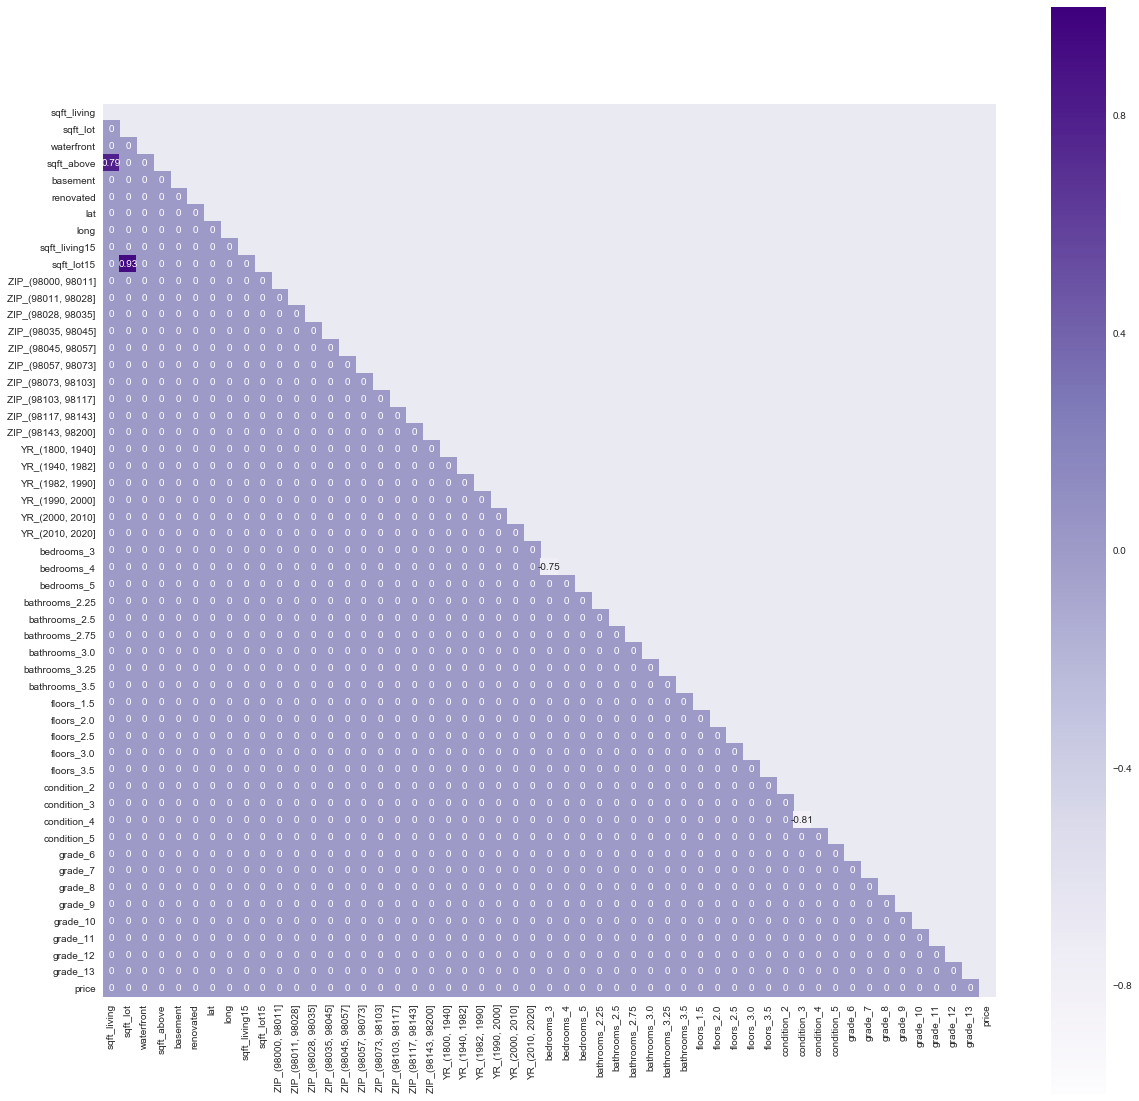

In [31]:
import seaborn as sns
plt.figure(figsize=(20, 20))
data_corr = data.corr()
data_corr[np.abs(data_corr)<.75] = 0
mask = np.zeros_like(data_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data_corr, mask=mask, center=0, annot=True, cmap="Purples", square = True, vmin=-1)

In [32]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
data.drop(['sqft_living', 'sqft_lot', 'condition_3', 'bedrooms_3'], axis = 1, inplace = True)

X = data.drop(['price', 'date', 'day', 'season'], axis=1)
y = data.price


def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X.astype(float), y)

print('resulting features:')
print(result)

Add  sqft_above                     with p-value 0.0
Add  basement                       with p-value 0.0
Add  lat                            with p-value 0.0
Add  grade_7                        with p-value 8.08521e-146
Add  grade_8                        with p-value 7.52714e-181
Add  YR_(1800, 1940]                with p-value 1.12085e-148
Add  grade_6                        with p-value 9.49854e-148
Add  waterfront                     with p-value 4.06382e-144
Add  grade_9                        with p-value 6.77783e-100
Add  sqft_living15                  with p-value 2.13011e-69
Add  ZIP_(98103, 98117]             with p-value 6.57558e-79
Add  ZIP_(98000, 98011]             with p-value 2.6036e-72
Add  condition_5                    with p-value 1.298e-59
Add  condition_4                    with p-value 1.66232e-54
Add  renovated                      with p-value 3.02138e-51
Add  ZIP_(98035, 98045]             with p-value 9.82005e-32
Add  grade_11                       with p-va

In [34]:
Z = data.drop(['sqft_above', 'basement', 'lat', 'grade_7',
               'grade_8', 'YR_(1800, 1940]', 'waterfront', 'grade_9',
               'sqft_living15', 'ZIP_(98103, 98117]', 'ZIP_(98000, 98011]',
               'condition_5', 'condition_4', 'renovated', 'ZIP_(98035, 98045]',
               'grade_11', 'grade_12', 'grade_10', 'grade_13', 'ZIP_(98011, 98028]',
               'YR_(2010, 2020]', 'bathrooms_2.5', 'ZIP_(98117, 98143]',
               'ZIP_(98057, 98073]', 'YR_(1982, 1990]', 'floors_2.0',
               'bathrooms_3.25', 'bathrooms_3.5', 'long', 'grade_6', 'floors_1.5',
               'YR_(1990, 2000]', 'bedrooms_4', 'bedrooms_5', 'ZIP_(98143, 98200]',
               'ZIP_(98045, 98057]', 'sqft_lot15'], axis=1)
X1 = data.drop(Z.columns, axis=1)
y1 = data.price
model = sm.OLS(y1, X1.astype(float))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                 1.312e+04
Date:                Fri, 27 Sep 2019   Prob (F-statistic):               0.00
Time:                        05:04:20   Log-Likelihood:                 16252.
No. Observations:               12397   AIC:                        -3.243e+04
Df Residuals:                   12360   BIC:                        -3.215e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
waterfront             0.1827      0.007     24.850      0.000       0.168       0.197
sqft_above             0.2954      0.009     34.131      0.000       0.278       0.312
basement               0.0454      0.002     26.311      0.000       0.042       0.049
renovated              0.0493      0.003     14.608      0.000       0.043       0.056
lat                    0.2278      0.003     74.358      0.000       0.222       0.234
long                  -0.0401      0.007     -6.161      0.000      -0.053      -0.027
sqft_living15          0.1450      0.008     17.135      0.000       0.128       0.162
sqft_lot15             0.0109      0.006      1.794      0.073      -0.001       0.023
ZIP_(98000, 98011]     0.0245      0.002     11.362      0.000       0.020       0.029
ZIP_(98011, 98028]    -0.0236      0.002     -9.934      0.000      -0.028      -0.019
ZIP_(98035, 98045]     0.0118      0.002      4.787      0.000       0.007       0.017
ZIP_(98045, 98057]    -0.0086      0.002     -3.665      0.000      -0.013      -0.004
ZIP_(98057, 98073]    -0.0190      0.002     -7.937      0.000      -0.024      -0.014
ZIP_(98103, 98117]     0.0457      0.003     17.378      0.000       0.041       0.051
ZIP_(98117, 98143]     0.0121      0.003      4.424      0.000       0.007       0.017
ZIP_(98143, 98200]    -0.0071      0.003     -2.777      0.006      -0.012      -0.002
YR_(1800, 1940]        0.0539      0.003     19.691      0.000       0.049       0.059
YR_(1982, 1990]       -0.0128      0.002     -6.704      0.000      -0.016      -0.009
YR_(1990, 2000]       -0.0069      0.002     -3.749      0.000      -0.011      -0.003
YR_(2010, 2020]        0.0113      0.002      4.735      0.000       0.007       0.016
bedrooms_4            -0.0048      0.001     -3.519      0.000      -0.007      -0.002
bedrooms_5            -0.0059      0.002     -2.605      0.009      -0.010      -0.001
bathrooms_2.5         -0.0036      0.001     -2.634      0.008      -0.006      -0.001
bathrooms_3.25         0.0185      0.003      6.036      0.000       0.013       0.025
bathrooms_3.5          0.0174      0.003      5.929      0.000       0.012       0.023
floors_1.5            -0.0085      0.003     -2.810      0.005      -0.014      -0.003
floors_2.0            -0.0103      0.002     -6.178      0.000      -0.014      -0.007
condition_4            0.0278      0.002     17.080      0.000       0.025       0.031
condition_5            0.0526      0.003     20.828      0.000       0.048       0.058
grade_6               -0.0811      0.008    -10.193      0.000      -0.097      -0.066
grade_7               -0.0400      0.007     -5.659      0.000      -0.054      -0.026
grade_8                0.0045      0.007      0.602      0.547      -0.010       0.019
grade_9                0.0553      0.0

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.33)

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)
print('difference: ' + str(np.round(abs(np.sqrt(mse_train)-np.sqrt(mse_test)),2)) )

Train Mean Squarred Error: 0.004153585621663747
Test Mean Squarred Error: 0.004435411331401034
difference: 0.0


In [45]:
Z = data.drop(['sqft_above', 'basement', 'lat', 'grade_7', 'YR_(1800, 1940]', 'waterfront', 'grade_9',
               'sqft_living15', 'ZIP_(98103, 98117]', 'ZIP_(98000, 98011]',
               'condition_5', 'condition_4', 'renovated', 'ZIP_(98035, 98045]',
               'grade_11', 'grade_12', 'grade_10', 'grade_13', 'ZIP_(98011, 98028]',
               'YR_(2010, 2020]', 'bathrooms_2.5', 'ZIP_(98117, 98143]',
               'ZIP_(98057, 98073]', 'YR_(1982, 1990]', 'floors_2.0',
               'bathrooms_3.25', 'bathrooms_3.5', 'long', 'grade_6', 'floors_1.5',
               'YR_(1990, 2000]', 'bedrooms_4', 'bedrooms_5', 'ZIP_(98143, 98200]',
               'ZIP_(98045, 98057]'], axis=1)
X2 = data.drop(Z.columns, axis=1)
y2 = data.price
model = sm.OLS(y2, X2.astype(float))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                 1.386e+04
Date:                Fri, 27 Sep 2019   Prob (F-statistic):               0.00
Time:                        05:09:33   Log-Likelihood:                 16250.
No. Observations:               12397   AIC:                        -3.243e+04
Df Residuals:                   12362   BIC:                        -3.217e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
waterfront             0.1833      0.007     24.981      0.000       0.169       0.198
sqft_above             0.3006      0.008     36.525      0.000       0.284       0.317
basement               0.0459      0.002     26.890      0.000       0.043       0.049
renovated              0.0499      0.003     14.823      0.000       0.043       0.056
lat                    0.2285      0.003     79.207      0.000       0.223       0.234
long                  -0.0381      0.005     -8.146      0.000      -0.047      -0.029
sqft_living15          0.1511      0.007     20.476      0.000       0.137       0.166
ZIP_(98000, 98011]     0.0248      0.002     11.524      0.000       0.021       0.029
ZIP_(98011, 98028]    -0.0227      0.002     -9.740      0.000      -0.027      -0.018
ZIP_(98035, 98045]     0.0125      0.002      5.256      0.000       0.008       0.017
ZIP_(98045, 98057]    -0.0084      0.002     -3.575      0.000      -0.013      -0.004
ZIP_(98057, 98073]    -0.0185      0.002     -7.795      0.000      -0.023      -0.014
ZIP_(98103, 98117]     0.0452      0.003     17.288      0.000       0.040       0.050
ZIP_(98117, 98143]     0.0118      0.003      4.345      0.000       0.006       0.017
ZIP_(98143, 98200]    -0.0071      0.003     -2.784      0.005      -0.012      -0.002
YR_(1800, 1940]        0.0534      0.003     19.610      0.000       0.048       0.059
YR_(1982, 1990]       -0.0119      0.002     -6.415      0.000      -0.016      -0.008
YR_(1990, 2000]       -0.0062      0.002     -3.416      0.001      -0.010      -0.003
YR_(2010, 2020]        0.0110      0.002      4.656      0.000       0.006       0.016
bedrooms_4            -0.0049      0.001     -3.601      0.000      -0.008      -0.002
bedrooms_5            -0.0062      0.002     -2.737      0.006      -0.011      -0.002
bathrooms_2.5         -0.0038      0.001     -2.737      0.006      -0.006      -0.001
bathrooms_3.25         0.0181      0.003      5.920      0.000       0.012       0.024
bathrooms_3.5          0.0170      0.003      5.810      0.000       0.011       0.023
floors_1.5            -0.0084      0.003     -2.791      0.005      -0.014      -0.002
floors_2.0            -0.0109      0.002     -6.691      0.000      -0.014      -0.008
condition_4            0.0283      0.002     17.638      0.000       0.025       0.031
condition_5            0.0530      0.003     21.122      0.000       0.048       0.058
grade_6               -0.0840      0.005    -18.260      0.000      -0.093      -0.075
grade_7               -0.0438      0.001    -30.161      0.000      -0.047      -0.041
grade_9                0.0506      0.002     28.206      0.000       0.047       0.054
grade_10               0.0921      0.003     34.738      0.000       0.087       0.097
grade_11               0.1374      0.0

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.33)

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)
print('difference: ' + str(np.round(abs(np.sqrt(mse_train)-np.sqrt(mse_test)),2)) )

Train Mean Squarred Error: 0.0042570881852751034
Test Mean Squarred Error: 0.004316005011791321
difference: 0.0
